In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as soup
import requests
from urllib.request import urlopen

In [2]:
#reading url

http_obj = urlopen('https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo,b5g')
webdata = http_obj.read()
print(webdata)

b'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.d4bb4f.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.

In [3]:
#parsing via beautifulsoup

data = soup(webdata, 'html.parser')
data

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.d4bb4f.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x

## Getting links of all the pages

In [4]:
base='https://www.flipkart.com'
pages_link=data.find_all('a',class_='ge-49M')
base+pages_link[0]['href']

'https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=1'

In [5]:
domain='https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page='
for i in range(2,24):
    link=domain+str(i)
    page_data=urlopen(link)
    webdata1=page_data.read()
    webdata += webdata1

In [6]:
alldata = soup(webdata, 'html.parser')
alldata

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.d4bb4f.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x

In [7]:
containers = alldata.find_all('div', class_='_2kHMtA')
len(containers)

552

In [8]:
f=open('laptops_all.csv','wb')
f.write('product_name,stars,rating,reviews,curr_price,mrp,processor,ram,image\n'.encode())

for container in containers:
    product = container.find('div', class_='_4rR01T')
    product_name=product.text.split('-')[0].strip()
    
    star = container.find('div', class_='_3LWZlK')
    try:
        stars=star.text
    except:
        stars=0
    
    ratings = container.find('span',class_='_2_R_DZ')
    try:
        rating=ratings.text.split()[0].replace(',','')
    except:
        rating=0
    
    review = container.find('span',class_='_2_R_DZ')
    try:
        reviews=review.text.split()[3].replace(',','')
    except:
        reviews=0
    
    curr_price = container.find('div', class_='_30jeq3 _1_WHN1').text.replace(',','').replace('₹','')
    
    MRP = container.find('div', class_='_3I9_wc _27UcVY')
    try:
        mrp=MRP.text.replace(',','').replace('₹','')
    except:
        mrp=0
    
    info=container.find_all('li',class_='rgWa7D')
    processor=info[0].text
    ram=info[1].text
    
    image_url=container.find('img',class_='_396cs4')
    image=image_url['src']
    
    print(product_name,stars,rating,reviews,curr_price,mrp,processor,ram,image)
    f.write(f'{product_name},{stars},{rating},{reviews},{curr_price},{mrp},{processor},{ram},{image}\n'.encode())
    print('\n')
f.close()

ASUS Chromebook Celeron Dual Core 3.6 427 53 14990 24990 Intel Celeron Dual Core Processor 4 GB LPDDR4 RAM https://rukminim2.flixcart.com/image/312/312/kwnv6a80/computer/9/c/i/-original-imag9aajekwegabt.jpeg?q=70


HP Chromebook x360 Intel Celeron Quad Core 3.8 201 20 18990 31156 Intel Celeron Quad Core Processor 4 GB LPDDR4 RAM https://rukminim2.flixcart.com/image/312/312/kzogn0w0/computer/j/u/m/14a-ca0504tu-thin-and-light-laptop-hp-original-imagbmt6dsjhwwhz.jpeg?q=70


HP 15s (2023) Athlon Dual Core 3050U 4.1 1850 163 31990 35147 AMD Athlon Dual Core Processor 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/5/6/i/-original-imaggshd5zgfe8ev.jpeg?q=70


ASUS Vivobook 15 Core i3 11th Gen 4.3 4561 411 37990 49990 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/q/e/z/-original-imagpxgqesgrthks.jpeg?q=70


Lenovo V15 Ryzen 5 Hexa Core 5500U 4.2 437 60 35990 69525 AMD Ryzen 5 Hexa Core Processor 8 GB DDR4

AttributeError: 'NoneType' object has no attribute 'text'

In [10]:
df=pd.read_csv(r'laptops_all.csv',error_bad_lines=False, index_col=None)
df

C:\Users\gargs\AppData\Local\Temp\ipykernel_78708\376650449.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(r'laptops_all.csv',error_bad_lines=False, index_col=None)


product_name  stars  rating  reviews  \
0             ASUS Chromebook Celeron Dual Core    3.6     427       53   
1    HP Chromebook x360 Intel Celeron Quad Core    3.8     201       20   
2          HP 15s (2023) Athlon Dual Core 3050U    4.1    1850      163   
3             ASUS Vivobook 15 Core i3 11th Gen    4.3    4561      411   
4            Lenovo V15 Ryzen 5 Hexa Core 5500U    4.2     437       60   
..                                          ...    ...     ...      ...   
342                DELL Ryzen 3 Quad Core 5425U    4.3      61        4   
343              Acer Aspire 3 Core i3 11th Gen    4.3      40        2   
344        Lenovo ThinkPad E14 Core i3 12th Gen    3.5       6        1   
345                    Lenovo Ryzen 3 Quad Core    0.0       0        0   
346              Ultimus Lite Celeron Dual Core    4.0      42        6   

     curr_price    mrp                                     processor  \
0         14990  24990             Intel Celeron Dual Core Processor   
1         18990  31156             Intel Celeron Quad Core Processor   
2         31990  35147                AMD Athlon Dual Core Processor   
3         37990  49990            Intel Core i3 Processor (11th Gen)   
4         35990  69525               AMD Ryzen 5 Hexa Core Processor   
..          ...    ...                                           ...   
342       41490  56834  Processor: R3-5425U (2.70 GHz up to 4.1 GHz)   
343       37550  49999            Intel Core i3 Processor (11th Gen)   
344       48000  85999            Intel Core i3 Processor (12th Gen)   
345       36990  49500               AMD Ryzen 3 Quad Core Processor   
346       13990  20990             Intel Celeron Dual Core Processor   

                                     ram  \
0                        4 GB LPDDR4 RAM   
1                        4 GB LPDDR4 RAM   
2                          8 GB DDR4 RAM   
3                          8 GB DDR4 RAM   
4                          8 GB DDR4 RAM   
..                                   ...   
342  RAM & Storage: 8GB DDR4 & 512GB SSD   
343                        8 GB DDR4 RAM   
344                        8 GB DDR4 RAM   
345                        8 GB DDR4 RAM   
346                        4 GB DDR4 RAM   

                                                 image  
0    https://rukminim2.flixcart.com/image/312/312/k...  
1    https://rukminim2.flixcart.com/image/312/312/k...  
2    https://rukminim2.flixcart.com/image/312/312/x...  
3    https://rukminim2.flixcart.com/image/312/312/x...  
4    https://rukminim2.flixcart.com/image/312/312/x...  
..                                                 ...  
342  https://rukminim2.flixcart.com/image/312/312/x...  
343  https://rukminim2.flixcart.com/image/312/312/k...  
344  https://rukminim2.flixcart.com/image/312/312/x...  
345  https://rukminim2.flixcart.com/image/312/312/x...  
346  https://rukminim2.flixcart.com/image/312/312/x...  

[347 rows x 9 columns]

In [11]:
df.shape

(347, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  347 non-null    object 
 1   stars         347 non-null    float64
 2   rating        347 non-null    int64  
 3   reviews       347 non-null    int64  
 4   curr_price    347 non-null    int64  
 5   mrp           347 non-null    int64  
 6   processor     347 non-null    object 
 7   ram           347 non-null    object 
 8   image         347 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 24.5+ KB


In [13]:
df2=df.drop_duplicates()
df2

product_name  stars  rating  reviews  \
0             ASUS Chromebook Celeron Dual Core    3.6     427       53   
1    HP Chromebook x360 Intel Celeron Quad Core    3.8     201       20   
2          HP 15s (2023) Athlon Dual Core 3050U    4.1    1850      163   
3             ASUS Vivobook 15 Core i3 11th Gen    4.3    4561      411   
4            Lenovo V15 Ryzen 5 Hexa Core 5500U    4.2     437       60   
..                                          ...    ...     ...      ...   
339                 Lenovo V14 Core i3 11th Gen    0.0       0        0   
342                DELL Ryzen 3 Quad Core 5425U    4.3      61        4   
343              Acer Aspire 3 Core i3 11th Gen    4.3      40        2   
344        Lenovo ThinkPad E14 Core i3 12th Gen    3.5       6        1   
345                    Lenovo Ryzen 3 Quad Core    0.0       0        0   

     curr_price    mrp                                     processor  \
0         14990  24990             Intel Celeron Dual Core Processor   
1         18990  31156             Intel Celeron Quad Core Processor   
2         31990  35147                AMD Athlon Dual Core Processor   
3         37990  49990            Intel Core i3 Processor (11th Gen)   
4         35990  69525               AMD Ryzen 5 Hexa Core Processor   
..          ...    ...                                           ...   
339       34990  44490            Intel Core i3 Processor (11th Gen)   
342       41490  56834  Processor: R3-5425U (2.70 GHz up to 4.1 GHz)   
343       37550  49999            Intel Core i3 Processor (11th Gen)   
344       48000  85999            Intel Core i3 Processor (12th Gen)   
345       36990  49500               AMD Ryzen 3 Quad Core Processor   

                                     ram  \
0                        4 GB LPDDR4 RAM   
1                        4 GB LPDDR4 RAM   
2                          8 GB DDR4 RAM   
3                          8 GB DDR4 RAM   
4                          8 GB DDR4 RAM   
..                                   ...   
339                        8 GB DDR4 RAM   
342  RAM & Storage: 8GB DDR4 & 512GB SSD   
343                        8 GB DDR4 RAM   
344                        8 GB DDR4 RAM   
345                        8 GB DDR4 RAM   

                                                 image  
0    https://rukminim2.flixcart.com/image/312/312/k...  
1    https://rukminim2.flixcart.com/image/312/312/k...  
2    https://rukminim2.flixcart.com/image/312/312/x...  
3    https://rukminim2.flixcart.com/image/312/312/x...  
4    https://rukminim2.flixcart.com/image/312/312/x...  
..                                                 ...  
339  https://rukminim2.flixcart.com/image/312/312/x...  
342  https://rukminim2.flixcart.com/image/312/312/x...  
343  https://rukminim2.flixcart.com/image/312/312/k...  
344  https://rukminim2.flixcart.com/image/312/312/x...  
345  https://rukminim2.flixcart.com/image/312/312/x...  

[217 rows x 9 columns]

## Product having highest rating

In [14]:
df2[df2['rating']==max(df2['rating'])]

product_name  stars  rating  reviews  \
109  ASUS VivoBook 15 (2022) Core i3 10th Gen    4.3   12158     1168   
134  ASUS VivoBook 15 (2022) Core i3 10th Gen    4.3   12158     1168   

     curr_price    mrp                           processor            ram  \
109       33990  50990  Intel Core i3 Processor (10th Gen)  8 GB DDR4 RAM   
134       35500  50990  Intel Core i3 Processor (10th Gen)  8 GB DDR4 RAM   

                                                 image  
109  https://rukminim2.flixcart.com/image/312/312/x...  
134  https://rukminim2.flixcart.com/image/312/312/x...

## Top 5 laptops based on ratings

In [15]:
top_5_rated=df2.sort_values(by='rating',ascending=False).head()
top_5_rated

product_name  stars  rating  reviews  \
134      ASUS VivoBook 15 (2022) Core i3 10th Gen    4.3   12158     1168   
109      ASUS VivoBook 15 (2022) Core i3 10th Gen    4.3   12158     1168   
269  realme Book(Slim) Intel Evo Core i5 11th Gen    4.4    7792     1027   
64   Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen    4.3    6954      641   
312           HP Chromebook MediaTek Kompanio 500    3.8    6543      729   

     curr_price    mrp                                        processor  \
134       35500  50990               Intel Core i3 Processor (10th Gen)   
109       33990  50990               Intel Core i3 Processor (10th Gen)   
269       47999  69999  Powered by 11th Gen Intel Evo Core i5 Processor   
64        37300  55490               Intel Core i3 Processor (11th Gen)   
312       19990  25451         MediaTek MediaTek Kompanio 500 Processor   

                                               ram  \
134                                  8 GB DDR4 RAM   
109                                  8 GB DDR4 RAM   
269  Microsoft Office 2019 Home & Student Included   
64                                   8 GB DDR4 RAM   
312                               4 GB LPDDR4X RAM   

                                                 image  
134  https://rukminim2.flixcart.com/image/312/312/x...  
109  https://rukminim2.flixcart.com/image/312/312/x...  
269  https://rukminim2.flixcart.com/image/312/312/k...  
64   https://rukminim2.flixcart.com/image/312/312/x...  
312  https://rukminim2.flixcart.com/image/312/312/x...

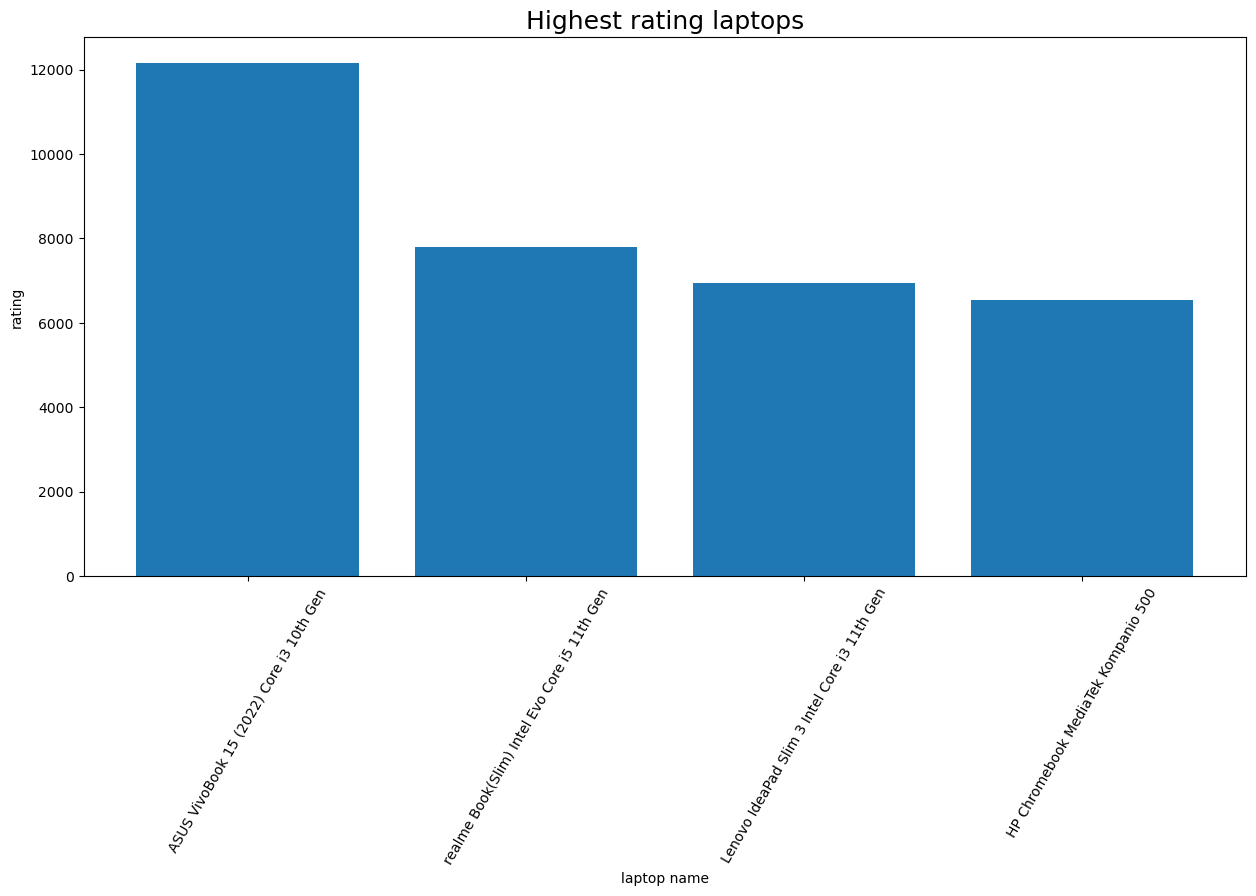

In [16]:
plt.figure(figsize=(15,7))
plt.bar(x=top_5_rated['product_name'],height=top_5_rated['rating'])
plt.title('Highest rating laptops',fontsize=18)
plt.xlabel('laptop name')
plt.ylabel('rating')
plt.xticks(rotation=60)
plt.show()

## Most affordable laptops

In [17]:
top10_affordable=df2.sort_values(by='curr_price',ascending=True).head(10)
top10_affordable

product_name  stars  rating  \
7           Primebook 4G Android Based MediaTek MT8788    4.1    1561   
56          Primebook 4G Android Based MediaTek MT8788    4.1    1561   
10                      Ultimus Lite Celeron Dual Core    4.0      42   
0                    ASUS Chromebook Celeron Dual Core    3.6     427   
21          Primebook 4G Android Based MediaTek MT8788    4.1     532   
16   Primebook 4G enabled Android based MediaTek MT...    3.5      26   
282                 Avita SATUS S111 Celeron Dual Core    3.7    1255   
279  Lenovo Slim 3 Chromebook Touch Intel Celeron D...    3.8     285   
308      ASUS Chromebook Touch Intel Celeron Dual Core    3.9    1350   
32                                HP Celeron Dual Core    4.0    1905   

     reviews  curr_price    mrp                           processor  \
7        479       13990  24990  MediaTek MediaTek MT8788 Processor   
56       479       13990  24990  MediaTek MediaTek MT8788 Processor   
10         6       13990  20990   Intel Celeron Dual Core Processor   
0         53       14990  24990   Intel Celeron Dual Core Processor   
21       167       14990  27990  MediaTek MediaTek MT8788 Processor   
16         4       14990  27990  MediaTek MediaTek MT8788 Processor   
282      156       16490  29990   Intel Celeron Dual Core Processor   
279       30       16990  39990   Intel Celeron Dual Core Processor   
308      170       17990  29990   Intel Celeron Dual Core Processor   
32       261       17990  30016   Intel Celeron Dual Core Processor   

                  ram                                              image  
7     4 GB LPDDR4 RAM  https://rukminim2.flixcart.com/image/312/312/x...  
56    4 GB LPDDR4 RAM  https://rukminim2.flixcart.com/image/312/312/x...  
10      4 GB DDR4 RAM  https://rukminim2.flixcart.com/image/312/312/x...  
0     4 GB LPDDR4 RAM  https://rukminim2.flixcart.com/image/312/312/k...  
21    4 GB LPDDR4 RAM  https://rukminim2.flixcart.com/image/312/312/x...  
16    4 GB LPDDR4 RAM  https://rukminim2.flixcart.com/image/312/312/x...  
282     4 GB DDR4 RAM  https://rukminim2.flixcart.com/image/312/312/l...  
279   4 GB LPDDR4 RAM  https://rukminim2.flixcart.com/image/312/312/x...  
308   4 GB LPDDR4 RAM  https://rukminim2.flixcart.com/image/312/312/l...  
32   4 GB LPDDR4X RAM  https://rukminim2.flixcart.com/image/312/312/x...

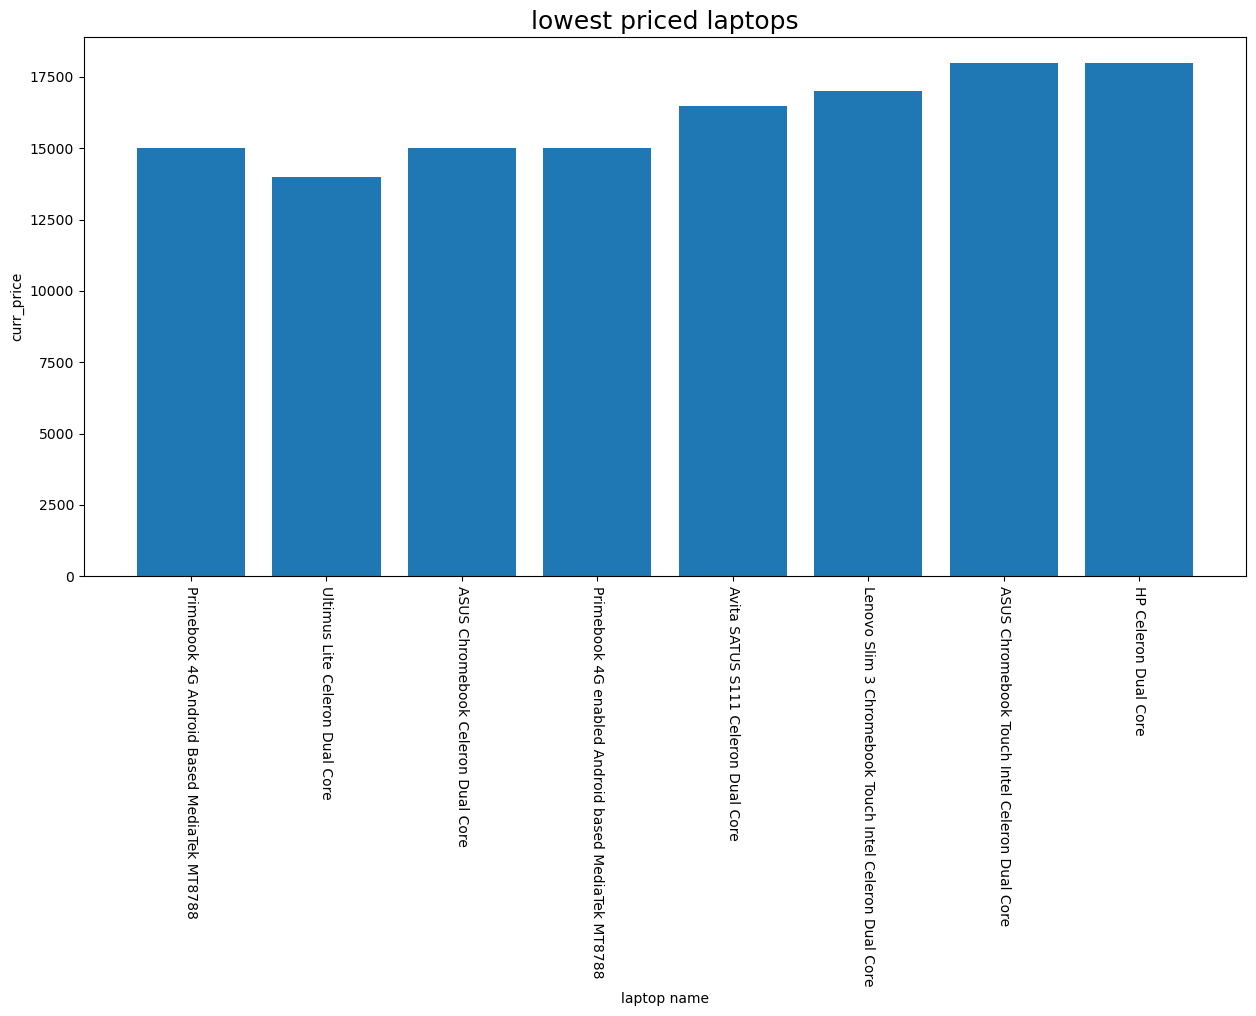

In [18]:
plt.figure(figsize=(15,7))
plt.bar(x=top10_affordable['product_name'],height=top10_affordable['curr_price'])
plt.title('lowest priced laptops',fontsize=18)
plt.xlabel('laptop name')
plt.ylabel('curr_price')
plt.xticks(rotation=270)
plt.show()

## Calculating discount

In [19]:
smalldf=df2[['product_name','curr_price','mrp']]
smalldf

product_name  curr_price    mrp
0             ASUS Chromebook Celeron Dual Core       14990  24990
1    HP Chromebook x360 Intel Celeron Quad Core       18990  31156
2          HP 15s (2023) Athlon Dual Core 3050U       31990  35147
3             ASUS Vivobook 15 Core i3 11th Gen       37990  49990
4            Lenovo V15 Ryzen 5 Hexa Core 5500U       35990  69525
..                                          ...         ...    ...
339                 Lenovo V14 Core i3 11th Gen       34990  44490
342                DELL Ryzen 3 Quad Core 5425U       41490  56834
343              Acer Aspire 3 Core i3 11th Gen       37550  49999
344        Lenovo ThinkPad E14 Core i3 12th Gen       48000  85999
345                    Lenovo Ryzen 3 Quad Core       36990  49500

[217 rows x 3 columns]

In [20]:
smalldf['discount']=smalldf['mrp']-smalldf['curr_price']

C:\Users\gargs\AppData\Local\Temp\ipykernel_78708\1426680961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smalldf['discount']=smalldf['mrp']-smalldf['curr_price']


### Highest discounted laptop

In [21]:
smalldf.sort_values(by='discount',ascending=False)

product_name  curr_price    mrp  \
22                               DELL Core i3 11th Gen       38490  99999   
225                     DELL Inspiron Core i5 11th Gen       49890  90783   
344               Lenovo ThinkPad E14 Core i3 12th Gen       48000  85999   
47              Lenovo IdeaPad Ryzen 5 Hexa Core 5500U       49490  86290   
254            Lenovo IdeaPad 3 Intel Core i5 12th Gen       49800  85400   
..                                                 ...         ...    ...   
262                                HP Core i3 11th Gen       42990  45410   
202                        DELL Athlon Dual Core 3050U       47852  49852   
68   Infinix Y1 Plus Neo Intel Celeron Quad Core 11...       24490  26390   
235       HP 247 G8 Athlon Dual Core AMD Athlon P3045B       23990  25334   
144  Infinix Y1 Plus Neo Intel Celeron Quad Core 11...       23990      0   

     discount  
22      61509  
225     40893  
344     37999  
47      36800  
254     35600  
..        ...  
262      2420  
202      2000  
68       1900  
235      1344  
144    -23990  

[217 rows x 4 columns]

In [22]:
df2.columns

Index(['product_name', 'stars', 'rating', 'reviews', 'curr_price', 'mrp',
       'processor', 'ram', 'image'],
      dtype='object')

In [23]:
df2

product_name  stars  rating  reviews  \
0             ASUS Chromebook Celeron Dual Core    3.6     427       53   
1    HP Chromebook x360 Intel Celeron Quad Core    3.8     201       20   
2          HP 15s (2023) Athlon Dual Core 3050U    4.1    1850      163   
3             ASUS Vivobook 15 Core i3 11th Gen    4.3    4561      411   
4            Lenovo V15 Ryzen 5 Hexa Core 5500U    4.2     437       60   
..                                          ...    ...     ...      ...   
339                 Lenovo V14 Core i3 11th Gen    0.0       0        0   
342                DELL Ryzen 3 Quad Core 5425U    4.3      61        4   
343              Acer Aspire 3 Core i3 11th Gen    4.3      40        2   
344        Lenovo ThinkPad E14 Core i3 12th Gen    3.5       6        1   
345                    Lenovo Ryzen 3 Quad Core    0.0       0        0   

     curr_price    mrp                                     processor  \
0         14990  24990             Intel Celeron Dual Core Processor   
1         18990  31156             Intel Celeron Quad Core Processor   
2         31990  35147                AMD Athlon Dual Core Processor   
3         37990  49990            Intel Core i3 Processor (11th Gen)   
4         35990  69525               AMD Ryzen 5 Hexa Core Processor   
..          ...    ...                                           ...   
339       34990  44490            Intel Core i3 Processor (11th Gen)   
342       41490  56834  Processor: R3-5425U (2.70 GHz up to 4.1 GHz)   
343       37550  49999            Intel Core i3 Processor (11th Gen)   
344       48000  85999            Intel Core i3 Processor (12th Gen)   
345       36990  49500               AMD Ryzen 3 Quad Core Processor   

                                     ram  \
0                        4 GB LPDDR4 RAM   
1                        4 GB LPDDR4 RAM   
2                          8 GB DDR4 RAM   
3                          8 GB DDR4 RAM   
4                          8 GB DDR4 RAM   
..                                   ...   
339                        8 GB DDR4 RAM   
342  RAM & Storage: 8GB DDR4 & 512GB SSD   
343                        8 GB DDR4 RAM   
344                        8 GB DDR4 RAM   
345                        8 GB DDR4 RAM   

                                                 image  
0    https://rukminim2.flixcart.com/image/312/312/k...  
1    https://rukminim2.flixcart.com/image/312/312/k...  
2    https://rukminim2.flixcart.com/image/312/312/x...  
3    https://rukminim2.flixcart.com/image/312/312/x...  
4    https://rukminim2.flixcart.com/image/312/312/x...  
..                                                 ...  
339  https://rukminim2.flixcart.com/image/312/312/x...  
342  https://rukminim2.flixcart.com/image/312/312/x...  
343  https://rukminim2.flixcart.com/image/312/312/k...  
344  https://rukminim2.flixcart.com/image/312/312/x...  
345  https://rukminim2.flixcart.com/image/312/312/x...  

[217 rows x 9 columns]

In [24]:
RAM=input('RAM?: ')
PROCESSOR=input('Processor?: ')
df2[df2.ram==RAM]
df2[df2.processor==PROCESSOR]

RAM?: 
Processor?: 


Empty DataFrame
Columns: [product_name, stars, rating, reviews, curr_price, mrp, processor, ram, image]
Index: []

In [25]:
df2.groupby('ram')['product_name'].count()

ram
16 GB DDR4 RAM                                     6
16 GB LPDDR4X RAM                                  2
4 GB DDR4 RAM                                     14
4 GB LPDDR4 RAM                                   12
4 GB LPDDR4X RAM                                   4
8 GB DDR4 RAM                                    136
8 GB LPDDR4 RAM                                    1
8 GB LPDDR4X RAM                                  16
8 GB LPDDR5 RAM                                   18
LPDDR5 RAM -faster & low power consuming           1
Microsoft Office 2019 Home & Student Included      1
RAM & Storage: 8GB DDR4 & 1TB + 256GB SSD          1
RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD      1
RAM & Storage: 8GB DDR4 & 256GB SSD                2
RAM & Storage: 8GB DDR4 & 512GB SSD                2
Name: product_name, dtype: int64

In [26]:
df_4gb=df2[df2['ram'].str.contains('4 GB')]
df_4gb

product_name  stars  rating  \
0                    ASUS Chromebook Celeron Dual Core    3.6     427   
1           HP Chromebook x360 Intel Celeron Quad Core    3.8     201   
7           Primebook 4G Android Based MediaTek MT8788    4.1    1561   
10                      Ultimus Lite Celeron Dual Core    4.0      42   
16   Primebook 4G enabled Android based MediaTek MT...    3.5      26   
17          HP Chromebook x360 Intel Celeron Dual Core    3.8     294   
21          Primebook 4G Android Based MediaTek MT8788    4.1     532   
32                                HP Celeron Dual Core    4.0    1905   
33   Infinix Y1 Plus Neo (2023) Celeron Quad Core 1...    4.1     790   
39                           HP Athlon Dual Core 3050U    4.0     139   
52          SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2    4.0     243   
56          Primebook 4G Android Based MediaTek MT8788    4.1    1561   
65                       Lenovo Athlon Dual Core 3050U    3.9     189   
93                       ASUS (2022) Celeron Dual Core    4.2     288   
121      ASUS Chromebook Touch Intel Celeron Dual Core    3.8    1971   
164                       Acer Aspire 3 Pentium Silver    4.3      48   
178                            Lenovo Athlon Dual Core    3.8     234   
199                       HP G Series Core i3 10th Gen    4.3     205   
208                            Lenovo Core i3 11th Gen    4.3     223   
220      ASUS Chromebook Touch Intel Celeron Dual Core    3.8    1971   
229              ASUS Vivobook Go 15 Celeron Dual Core    4.1     291   
233                  ASUS EeeBook 12 Celeron Dual Core    3.7     125   
234               Lenovo ThinkPad E15 Core i3 11th Gen    4.0      66   
242                     DELL Inspiron Core i3 10th Gen    4.4     695   
244                            Lenovo Core i3 11th Gen    3.5     180   
279  Lenovo Slim 3 Chromebook Touch Intel Celeron D...    3.8     285   
282                 Avita SATUS S111 Celeron Dual Core    3.7    1255   
308      ASUS Chromebook Touch Intel Celeron Dual Core    3.9    1350   
312                HP Chromebook MediaTek Kompanio 500    3.8    6543   
329                         HP intel Celeron Dual Core    3.7     233   

     reviews  curr_price    mrp                                     processor  \
0         53       14990  24990             Intel Celeron Dual Core Processor   
1         20       18990  31156             Intel Celeron Quad Core Processor   
7        479       13990  24990            MediaTek MediaTek MT8788 Processor   
10         6       13990  20990             Intel Celeron Dual Core Processor   
16         4       14990  27990            MediaTek MediaTek MT8788 Processor   
17        28       18990  32295             Intel Celeron Dual Core Processor   
21       167       14990  27990            MediaTek MediaTek MT8788 Processor   
32       261       17990  30016             Intel Celeron Dual Core Processor   
33       126       20990  29990  Intel Celeron Quad Core Processor (11th Gen)   
39        13       22999  31690                AMD Athlon Dual Core Processor   
52        47       29990  47990        Qualcomm Snapdragon 7c Gen 2 Processor   
56       479       13990  24990            MediaTek MediaTek MT8788 Processor   
65        15       21490  35000                AMD Athlon Dual Core Processor   
93        25       20990  30990             Intel Celeron Dual Core Processor   
121      283       18990  30990             Intel Celeron Dual Core Processor   
164        6       25490  34990                Intel Pentium Silver Processor   
178       19       21290  38000                AMD Athlon Dual Core Processor   
199       14       37990  44072            Intel Core i3 Processor (10th Gen)   
208       29       34990  49096            Intel Core i3 Processor (11th Gen)   
220      283       20800  30990             Intel Celeron Dual Core Processor   
229       27       25990  33990             Intel Celeron Dual Core Processor

In [27]:
df_8gb=df2[df2['ram'].str.contains('8 GB')]
df_8gb

product_name  stars  rating  reviews  curr_price  \
2    HP 15s (2023) Athlon Dual Core 3050U    4.1    1850      163       31990   
3       ASUS Vivobook 15 Core i3 11th Gen    4.3    4561      411       37990   
4      Lenovo V15 Ryzen 5 Hexa Core 5500U    4.2     437       60       35990   
5           HP 14s Intel Core i3 11th Gen    4.3    3674      304       35490   
6    HP 15s (2023) Intel Core i3 12th Gen    4.2     505       42       42990   
..                                    ...    ...     ...      ...         ...   
338               Lenovo Core i3 12th Gen    3.9      15        0       35990   
339           Lenovo V14 Core i3 11th Gen    0.0       0        0       34990   
343        Acer Aspire 3 Core i3 11th Gen    4.3      40        2       37550   
344  Lenovo ThinkPad E14 Core i3 12th Gen    3.5       6        1       48000   
345              Lenovo Ryzen 3 Quad Core    0.0       0        0       36990   

       mrp                           processor            ram  \
2    35147      AMD Athlon Dual Core Processor  8 GB DDR4 RAM   
3    49990  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
4    69525     AMD Ryzen 5 Hexa Core Processor  8 GB DDR4 RAM   
5    47279  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
6    51266  Intel Core i3 Processor (12th Gen)  8 GB DDR4 RAM   
..     ...                                 ...            ...   
338  54137  Intel Core i3 Processor (12th Gen)  8 GB DDR4 RAM   
339  44490  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
343  49999  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
344  85999  Intel Core i3 Processor (12th Gen)  8 GB DDR4 RAM   
345  49500     AMD Ryzen 3 Quad Core Processor  8 GB DDR4 RAM   

                                                 image  
2    https://rukminim2.flixcart.com/image/312/312/x...  
3    https://rukminim2.flixcart.com/image/312/312/x...  
4    https://rukminim2.flixcart.com/image/312/312/x...  
5    https://rukminim2.flixcart.com/image/312/312/x...  
6    https://rukminim2.flixcart.com/image/312/312/x...  
..                                                 ...  
338  https://rukminim2.flixcart.com/image/312/312/x...  
339  https://rukminim2.flixcart.com/image/312/312/x...  
343  https://rukminim2.flixcart.com/image/312/312/k...  
344  https://rukminim2.flixcart.com/image/312/312/x...  
345  https://rukminim2.flixcart.com/image/312/312/x...  

[171 rows x 9 columns]

In [28]:
df_16gb=df2[df2['ram'].str.contains('16 GB')]
df_16gb

product_name  stars  rating  reviews  \
47   Lenovo IdeaPad Ryzen 5 Hexa Core 5500U    4.3    2364      250   
98        ASUS Vivobook 14 Core i3 11th Gen    0.0       0        0   
138          Acer Aspire 3 Core i5 12th Gen    3.9     124       13   
154              HP Ryzen 5 Hexa Core 5500U    4.3     437       31   
194  Infinix X3 Slim Intel Core i5 12th Gen    0.0       0        0   
214  Infinix X3 Slim Intel Core i7 12th Gen    0.0       0        0   
225          DELL Inspiron Core i5 11th Gen    4.3      20        4   
318                     Valve Zen 2 2nd Gen    4.3       4        0   

     curr_price    mrp                           processor                ram  \
47        49490  86290     AMD Ryzen 5 Hexa Core Processor     16 GB DDR4 RAM   
98        42990  59990  Intel Core i3 Processor (11th Gen)     16 GB DDR4 RAM   
138       47990  67999  Intel Core i5 Processor (12th Gen)     16 GB DDR4 RAM   
154       47440  59241     AMD Ryzen 5 Hexa Core Processor     16 GB DDR4 RAM   
194       40990  64990  Intel Core i5 Processor (12th Gen)  16 GB LPDDR4X RAM   
214       49990  69990  Intel Core i7 Processor (12th Gen)  16 GB LPDDR4X RAM   
225       49890  90783  Intel Core i5 Processor (11th Gen)     16 GB DDR4 RAM   
318       49490  55990       AMD Zen 2 Processor (2nd Gen)     16 GB DDR4 RAM   

                                                 image  
47   https://rukminim2.flixcart.com/image/312/312/x...  
98   https://rukminim2.flixcart.com/image/312/312/x...  
138  https://rukminim2.flixcart.com/image/312/312/x...  
154  https://rukminim2.flixcart.com/image/312/312/x...  
194  https://rukminim2.flixcart.com/image/312/312/x...  
214  https://rukminim2.flixcart.com/image/312/312/x...  
225  https://rukminim2.flixcart.com/image/312/312/k...  
318  https://rukminim2.flixcart.com/image/312/312/x...

In [41]:
print('avg price for 4gb:',df_4gb["curr_price"].mean().round(0))
print('avg price for 8gb:',df_8gb["curr_price"].mean().round(0))
print('avg price for 16gb:',df_16gb["curr_price"].mean().round(0))

avg price for 4gb: 22478.0
avg price for 8gb: 38383.0
avg price for 16gb: 47284.0


THE AVERAGE PRICE INCREASES WITH INCREASE IN RAM

Processors with most no. of laptops

In [61]:
processor_count=df2.groupby('processor')['product_name'].count().sort_values(ascending=False)
top_processors=processor_count.head(10)
top_processors

processor
Intel Core i3 Processor (11th Gen)    61
AMD Ryzen 3 Quad Core Processor       19
Intel Celeron Dual Core Processor     18
Intel Core i3 Processor (10th Gen)    15
Intel Core i3 Processor (12th Gen)    14
AMD Ryzen 3 Dual Core Processor       11
AMD Athlon Dual Core Processor        10
Intel Core i5 Processor (11th Gen)     9
AMD Ryzen 5 Hexa Core Processor        9
AMD Ryzen 5 Quad Core Processor        7
Name: product_name, dtype: int64

<Axes: xlabel='processor'>

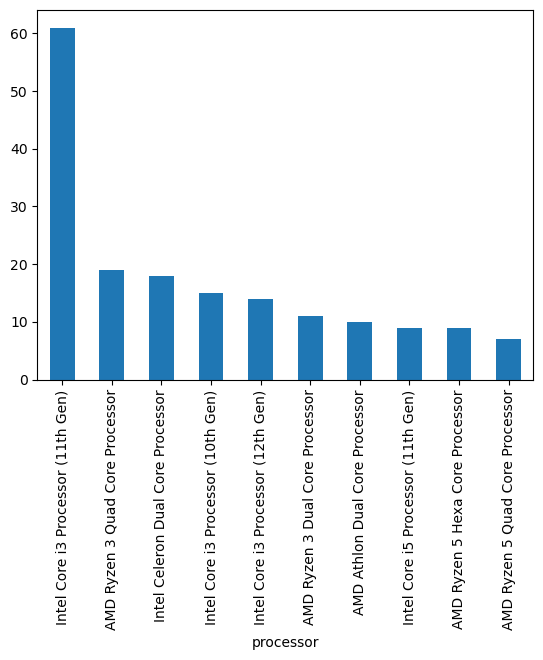

In [62]:
top_processors.plot(kind='bar')

In [70]:
df_i3core=df2[df2['processor']=='Intel Core i3 Processor (11th Gen)']
df_i3core

product_name  stars  rating  reviews  curr_price  \
3      ASUS Vivobook 15 Core i3 11th Gen    4.3    4561      411       37990   
5          HP 14s Intel Core i3 11th Gen    4.3    3674      304       35490   
9          HP 14s Intel Core i3 11th Gen    4.3    5406      455       37890   
12                  MSI Core i3 11th Gen    4.3     471       58       32990   
20   DELL Inspiron 3000 Core i3 11th Gen    4.1     956      138       37479   
..                                   ...    ...     ...      ...         ...   
325       Acer Aspire 3 Core i3 11th Gen    4.3      46        1       38700   
333           HP 240 G8 Core i3 11th Gen    0.0       0        0       36890   
335       DELL Inspiron Core i3 11th Gen    4.0       6        0       39990   
339          Lenovo V14 Core i3 11th Gen    0.0       0        0       34990   
343       Acer Aspire 3 Core i3 11th Gen    4.3      40        2       37550   

       mrp                           processor            ram  \
3    49990  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
5    47279  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
9    49509  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
12   52990  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
20   59119  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
..     ...                                 ...            ...   
325  49999  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
333  51230  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
335  58200  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
339  44490  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
343  49999  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   

                                                 image  
3    https://rukminim2.flixcart.com/image/312/312/x...  
5    https://rukminim2.flixcart.com/image/312/312/x...  
9    https://rukminim2.flixcart.com/image/312/312/x...  
12   https://rukminim2.flixcart.com/image/312/312/x...  
20   https://rukminim2.flixcart.com/image/312/312/l...  
..                                                 ...  
325  https://rukminim2.flixcart.com/image/312/312/l...  
333  https://rukminim2.flixcart.com/image/312/312/x...  
335  https://rukminim2.flixcart.com/image/312/312/k...  
339  https://rukminim2.flixcart.com/image/312/312/x...  
343  https://rukminim2.flixcart.com/image/312/312/k...  

[61 rows x 9 columns]

In [71]:
print('avg_price:',df_i3core['curr_price'].mean())
print('avg_rating:',df_i3core['rating'].mean())

avg_price: 37935.098360655735
avg_rating: 783.311475409836


In [74]:
df2.to_csv('final_lap.csv',index=None)